In [2]:
 !pip install fredapi

import pandas as pd
import matplotlib.pyplot as plt
from fredapi import Fred
fred = Fred(api_key='089a52d4f026aef2de15dee54da085e6')

In [7]:
# 1. Fetch the data deries
print("Fetching data from FRED...")
wages = fred.get_series('AHETPI')
cpi = fred.get_series('CPIAUCSL')

# 2. Combine into a DataFrame
df = pd.DataFrame({'Nominal_Wage': wages, 'CPI': cpi})

# 3. Drop Missing values (The wage data starts later than CPI data)
df = df.dropna()

# Inspect the raw data
print(df.head())
print(df.tail())


Fetching data from FRED...
            Nominal_Wage    CPI
1964-01-01          2.50  30.94
1964-02-01          2.50  30.91
1964-03-01          2.51  30.94
1964-04-01          2.52  30.95
1964-05-01          2.52  30.98
            Nominal_Wage      CPI
2025-06-01         31.26  321.500
2025-07-01         31.35  322.132
2025-08-01         31.45  323.364
2025-09-01         31.52  324.368
2025-11-01         31.73  325.031


In [8]:
def get_real_wage(nominal_col, cpi_col):
    """
    Takes a nominal column and a CPI column.
    Returns a new column adjusted for inflation (real dollars).
    """
    cpi_today = cpi_col.iloc[-1]
    real_col = (nominal_col/cpi_col)*cpi_today
    return real_col

df['Real_Wage'] = get_real_wage(df['Nominal_Wage'], df['CPI'])

print(df.tail())

            Nominal_Wage      CPI  Real_Wage
2025-06-01         31.26  321.500  31.603325
2025-07-01         31.35  322.132  31.632132
2025-08-01         31.45  323.364  31.612130
2025-09-01         31.52  324.368  31.584426
2025-11-01         31.73  325.031  31.730000


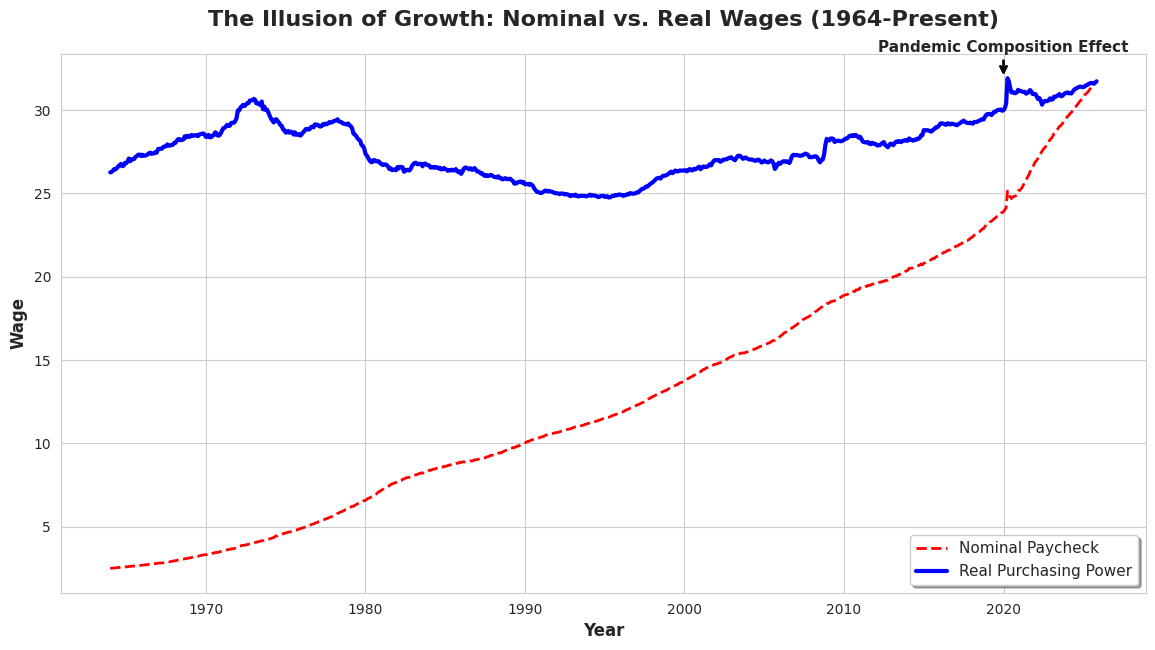

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas to use Timestamp

# Set the style
sns.set_style("whitegrid")

# Create the figure with specified size
fig, ax = plt.subplots(figsize=(14, 7))

# Plot Nominal Wage as dashed red line
ax.plot(df.index, df['Nominal_Wage'],
        color='red',
        linestyle='--',
        linewidth=2,
        label='Nominal Paycheck')

# Plot Real Wage as thick blue line
ax.plot(df.index, df['Real_Wage'],
        color='blue',
        linewidth=3,
        label='Real Purchasing Power')

# Add title and labels
ax.set_title('The Illusion of Growth: Nominal vs. Real Wages (1964-Present)',
             fontsize=16,
             fontweight='bold',
             pad=20)
ax.set_xlabel('Year', fontsize=12, fontweight='bold')
ax.set_ylabel('Wage', fontsize=12, fontweight='bold')

# Add legend
ax.legend(loc='best', fontsize=11, frameon=True, shadow=True)

# Add annotation for 2020 pandemic spike
# Find the 2020 value (adjust if your data uses different date format)
try:
    spike_year_str = '2020'
    # Convert the year string to a pandas Timestamp for plotting on a datetime axis
    spike_date = pd.Timestamp(spike_year_str + '-01-01') # Use first day of the year for annotation
    spike_value = df.loc[df.index.year == int(spike_year_str), 'Real_Wage'].max()

    ax.annotate('Pandemic Composition Effect',
                xy=(spike_date, spike_value),
                xytext=(spike_date, spike_value * 1.05),
                arrowprops=dict(arrowstyle='->',
                               color='black',
                               lw=2),
                fontsize=11,
                fontweight='bold',
                ha='center')
except:
    # Fallback - the original SyntaxError: incomplete input was here
    pass


/tmp/ipython-input-3386731751.py:44: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  eci_2020_value = eci_rebased.loc[eci_rebased.index.year == 2020][0]  # Fixed: use eci_rebased.index


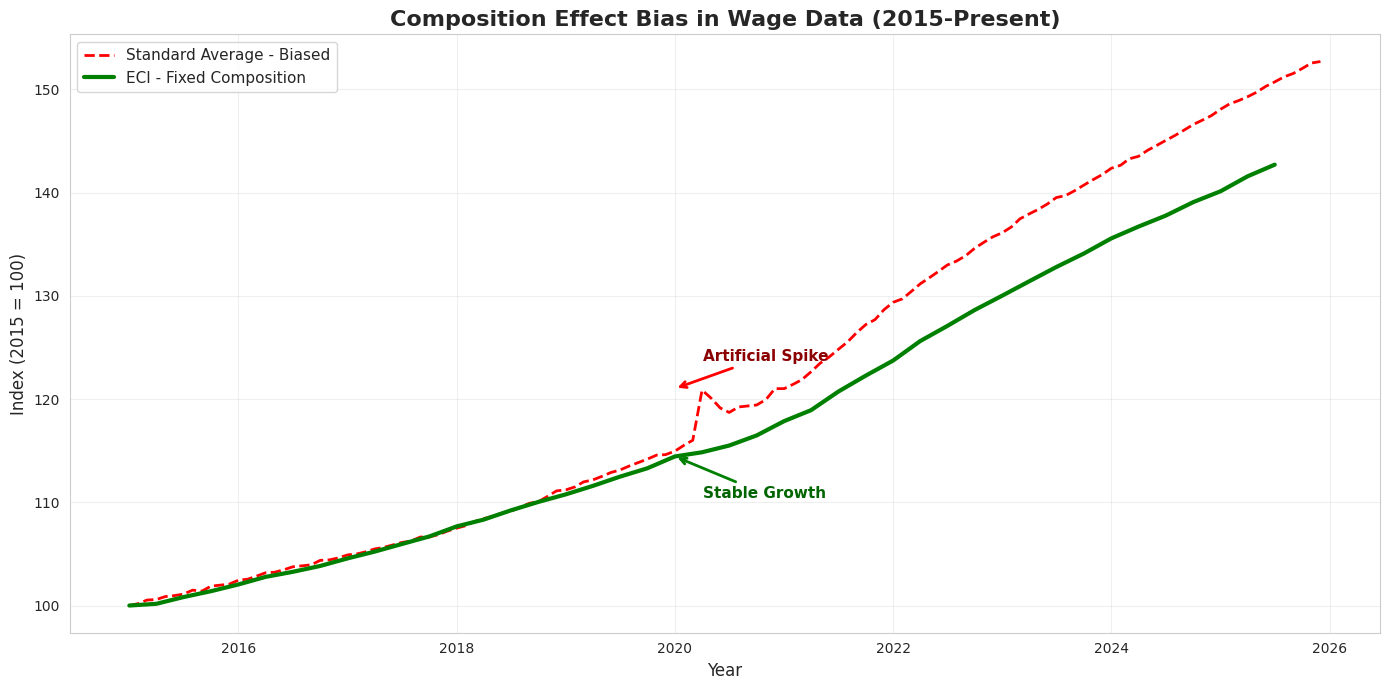

In [16]:
import matplotlib.pyplot as plt

# 1. Fetch the Employment Cost Index (ECI)
eci = fred.get_series('ECIWAG')

# 2. Filter both series to dates from 2015-01-01 onwards
wages_filtered = wages['2015-01-01':]
eci_filtered = eci['2015-01-01':]

# 3. Rebase both series to 100 (first value = 100)
wages_rebased = (wages_filtered / wages_filtered.iloc[0]) * 100
eci_rebased = (eci_filtered / eci_filtered.iloc[0]) * 100

# 4. Create the plot
fig, ax = plt.subplots(figsize=(14, 7))

# Plot wages as red dashed line
ax.plot(wages_rebased.index, wages_rebased,
        color='red',
        linestyle='--',
        linewidth=2,
        label='Standard Average - Biased')

# Plot ECI as green thick line
ax.plot(eci_rebased.index, eci_rebased,
        color='green',
        linewidth=3,
        label='ECI - Fixed Composition')

# Add title and labels
ax.set_title('Composition Effect Bias in Wage Data (2015-Present)',
             fontsize=16,
             fontweight='bold')
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Index (2015 = 100)', fontsize=12)

# Add legend
ax.legend(loc='best', fontsize=11)

# 5. Annotate the 2020 divergence
# Find 2020 peak for wages
spike_date = wages_rebased.index[wages_rebased.index.year == 2020][0]
wages_2020_peak = wages_rebased.loc[wages_rebased.index.year == 2020].max()
eci_2020_value = eci_rebased.loc[eci_rebased.index.year == 2020][0]  # Fixed: use eci_rebased.index

# Annotate the artificial spike in standard wages
ax.annotate('Artificial Spike',
            xy=(spike_date, wages_2020_peak),
            xytext=(20, 20),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='red', lw=2),
            fontsize=11,
            fontweight='bold',
            color='darkred')

# Annotate the stable growth in ECI
ax.annotate('Stable Growth',
            xy=(spike_date, eci_2020_value),
            xytext=(20, -30),
            textcoords='offset points',
            arrowprops=dict(arrowstyle='->', color='green', lw=2),
            fontsize=11,
            fontweight='bold',
            color='darkgreen')

plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()